# GENERATION DE NOUVEAUX NOMS DE DINOSAURES
## auteurs: Timothée JUILLET
### Objectif : générer des nouveaux noms de dinosaures en se basant sur des noms de déjà existants, présents dans le fichier dinos.txt

Aide de ChatGPT pour l'affichage des matrices et graphiques ainsi que le découpage manuel des noms.


In [1]:
import tensorflow as tf
import numpy as np
import string
import matplotlib.pyplot as plt

## Charger les données

In [2]:
# Read the file
with open('dinos.txt') as f:
    dinos = f.readlines()

# Remove the newline character
dinos = [dino.strip() for dino in dinos]

# Remove capital letters
dinos = [dino.lower() for dino in dinos]

# Print the list
print("Il y a tant de dinosaures :", len(dinos))

Il y a tant de dinosaures : 1536


## Analyser les données

### Fréquence d'apparition lettres

In [3]:
def letterFrequency(filepath):
    with open(filepath) as f:
        text = f.read()
    text = text.lower()
    letter_freq = {}
    for letter in string.ascii_lowercase:
        letter_freq[letter] = text.count(letter)
    return letter_freq

### Affichage de la fréquence de base d'apparition des lettes dans les noms du fichier

<BarContainer object of 26 artists>

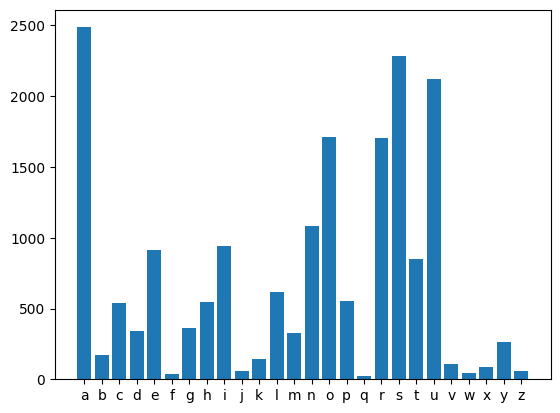

In [4]:
letters = letterFrequency('dinos.txt')
plt.bar(letters.keys(), letters.values())

### Fréquence d'apparition lettres par position dans le mot

In [5]:
def letterFrequencyByPosition(filepath):
    with open(filepath) as f:
        text = f.read()
    text = text.lower()
    # for each letter, count the number of times it appears in each position starting from 0 and going to the length of the longest word
    letter_freq = {}
    for letter in string.ascii_lowercase:
        letter_freq[letter] = [0] * len(max(text.split(), key=len))
    for word in text.split():
        for i in range(len(word)):
            letter_freq[word[i]][i] += 1
    return letter_freq

### Affichage de la fréquence d'apparition lettres par position dans le mot

In [6]:
def plot_letter_frequencies(lettersByPosition,
                          figsize=(15, 10),
                          cmap='Blues',
                          title='Fréquence des lettres par position dans les noms de dinosaures',
                          show_colorbar=True,
                          min_value=None,
                          max_value=None):

    # Conversion des données en array numpy
    data = np.array(list(lettersByPosition.values()))

    # Création de la figure
    fig, ax = plt.subplots(figsize=figsize)

    # Affichage de la matrice
    im = ax.matshow(data, cmap=cmap, vmin=min_value, vmax=max_value)

    # Ajout des annotations numériques dans chaque cellule
    for i in range(len(lettersByPosition)):
        for j in range(len(max(lettersByPosition.values(), key=len))):
            if j < len(data[i]):
                # Calcul de la couleur du texte en fonction de la valeur de fond
                background_value = data[i][j]
                text_color = "white" if background_value > np.max(data)/2 else "black"

                # Ajout du texte
                ax.text(j, i, str(data[i][j]),
                       ha="center", va="center",
                       color=text_color)

    # Configuration des axes
    ax.set_xticks(range(len(max(lettersByPosition.values(), key=len))))
    ax.set_yticks(range(len(lettersByPosition)))
    ax.set_xticklabels(range(len(max(lettersByPosition.values(), key=len))))
    ax.set_yticklabels(lettersByPosition.keys())

    # Ajout des labels
    plt.xlabel('Position dans le mot')
    plt.ylabel('Lettre')
    plt.title(title)

    # Ajout de la barre de couleur si demandée
    if show_colorbar:
        plt.colorbar(im)

    # Ajustement automatique de la mise en page
    plt.tight_layout()

    return fig, ax

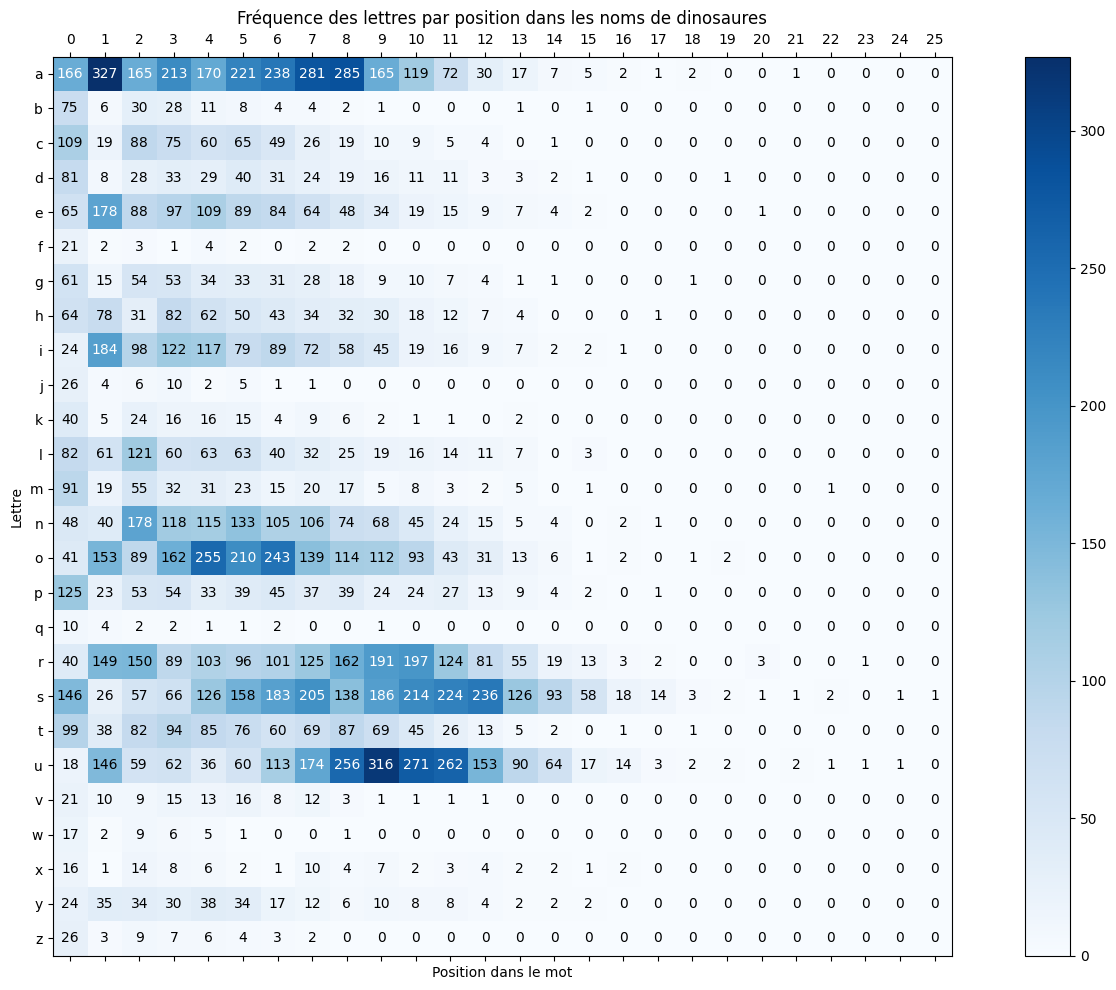

In [7]:
lettersByPosition = letterFrequencyByPosition('dinos.txt')
plot_letter_frequencies(lettersByPosition)
plt.show()

### Taille moyenne des noms

In [8]:
# Give the average length of the words
average_length = sum([len(word) for word in dinos]) / len(dinos)
print(average_length)
average_length = round(average_length)

11.962239583333334


### Création d'un nom de dinosaure en prenant en compte la fréquence d'apparition des lettres par position dans le mot, pour s'en servir de valeur étalon

In [9]:
averageDino = ''
# get the letter that appears most frequently in each position
for i in range(average_length):
    max_letter = ''
    max_count = 0
    for letter in string.ascii_lowercase:
        if lettersByPosition[letter][i] > max_count:
            max_count = lettersByPosition[letter][i]
            max_letter = letter
    averageDino += max_letter
print(averageDino)

aanaoaoaauuu


"Aanaoaoaauuu" comme dinosaur étalon

# Model 1 : n-grammes

## Preprocessing des données

### Choix d'un n-gram

In [10]:
# Préparation des données
# Configuration des paramètres
max_name_length = max(len(name) for name in dinos) + 2  # +2 pour les tokens début/fin
ngram_size = 3

### Ajout des marqueurs de début et fin

In [11]:
processed_dinos = ['<' + name + '>' for name in dinos]

### Utilisation de TextVectorization pour créer automatiquement les tokens n-grams

In [12]:
# Créer le vectoriseur avec n-grams
vectorizer1 = tf.keras.layers.TextVectorization(
    standardize=None,
    split='character',
    ngrams=ngram_size,
    output_sequence_length=int((ngram_size * ngram_size+1)/2), # on ne passe au vectorizer que des entrées déjà découpées. Avec un ngram 3, il transforme un nom comme "dino" en "d i n o di in no din ino". Le max est donc la somme de tous les entierse jusqu'à n.
    max_tokens=None,
    output_mode='int'
)

# Adapter le vectoriseur aux données
vectorizer1.adapt(processed_dinos)

# Récupération du vocabulaire
vocab1 = vectorizer1.get_vocabulary()
vocab_size1 = len(vocab1)

print("Taille du vocabulaire :",vocab_size1)
print(vocab1[:100])

Taille du vocabulaire : 3254
['', '[UNK]', 'a', 's', 'u', 'o', 'r', '>', '<', 'n', 's >', 'u s', 'i', 'u s >', 'e', 't', 'u r', 's a', 'a u', 'a u r', 'r u', 's a u', 'r u s', 'u r u', 'l', 'p', 'h', 'c', 'o s', 'o s a', 'g', 'a n', 'd', 'm', 't o', 'r a', 'o n', 'y', 'r o', 'o r', 'a t', 'n o', 'e r', 'i a', 'o p', 'l o', 'b', 'a s', 'c h', '< a', 't a', 'n g', '< s', 'k', 'e n', 'a l', 'a >', 'i n', 'i s', 'd o', '< p', 'n >', 'a r', 'n a', 'a t o', 'h a', 'c e', 'h o', 'e l', 'v', '< c', 't e', 'a s a', 'h u', 'o d', 'r i', 'a c', '< t', 't o r', 'n i', 'l a', 'm a', 'n o s', 'o c', 'p s', 'r >', '< m', 'g o', 'd o n', 'e s', 'a p', 'o d o', 'i t', 'o r >', 'r o s', 'p t', 'i a >', 'x', 's t', 'l i']


### Méthode n-gram : on ne garde que les n première lettre en mémoire dans X et on prédit la suite. Exception du début du mot ou on garde seulement ma première, puis les deux premières etc... jusqu'à n lettres.

### On profite d'avoir des tokens déjà fait pour ne pas seulement prédire la lettre suivante, mais tous les tokens suivants (donc la lettre suivante, les deux suivantes, etc... jusqu'aux n suivantes)

In [13]:
# Préparer les données d'entraînement
X = []
y = []

for name in processed_dinos:
    for i in range(ngram_size-1, len(name)):  # Itérer sur chaque position du nom
        start_sequence = name[:i + 1]  # Le début du mot jusqu'à l'index i
        if len(start_sequence) > ngram_size:
            start_sequence = start_sequence[-ngram_size:] # Garder les ngram_size derniers caractères
        for n in range(1, ngram_size + 1):  # Pour n allant de 1 à ngram_size
            if i + n < len(name):  # Vérifier si on peut ajouter n lettres
                X.append(start_sequence)  # Ajouter le début
                # Transformer la séquence dans y en caractères individuels car le tokeniser sépare les lettres avec des espaces
                y.append(" ".join(list(name[i + 1:i + n + 1])))

# Afficher les tailles de X et y
print(f'Taille de X: {len(X)}, Taille de y: {len(y)}')
print("X complet premier dinosaur : ", X[:33])
print("y complet premier dinosaur : ", y[:33])

average_length = sum([len(word) for word in y]) / len(y)
print(average_length)


Taille de X: 45906, Taille de y: 45906
X complet premier dinosaur :  ['<aa', '<aa', '<aa', 'aac', 'aac', 'aac', 'ach', 'ach', 'ach', 'che', 'che', 'che', 'hen', 'hen', 'hen', 'eno', 'eno', 'eno', 'nos', 'nos', 'nos', 'osa', 'osa', 'osa', 'sau', 'sau', 'sau', 'aur', 'aur', 'aur', 'uru', 'uru', 'rus']
y complet premier dinosaur :  ['c', 'c h', 'c h e', 'h', 'h e', 'h e n', 'e', 'e n', 'e n o', 'n', 'n o', 'n o s', 'o', 'o s', 'o s a', 's', 's a', 's a u', 'a', 'a u', 'a u r', 'u', 'u r', 'u r u', 'r', 'r u', 'r u s', 'u', 'u s', 'u s >', 's', 's >', '>']
2.8661612861063914


### Convertir X et Y dans les formats attendus par le modèle

In [14]:
# Convertir X en vecteurs d'entiers
X = vectorizer1(X)
y = np.array([vocab1.index(char) for char in y])  # Convertir les lettres en indices
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size1)

# print vocab
print(X[4])

tf.Tensor([  2   2  27 587  76], shape=(5,), dtype=int64)


## Création du modèle

In [15]:
# Define the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size1, output_dim=128, input_length=int((ngram_size * ngram_size+1)/2)),
    tf.keras.layers.Flatten(),  # Flatten the embeddings
    tf.keras.layers.Dense(vocab_size1, activation='softmax')  # Predict next token in vocabulary
])

/Users/timotheejuillet/Documents/Polywork/si5/Apprentissage Texte/dinosaurs/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilation du modèle

In [16]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Entraînement le modèle

In [17]:
history = model1.fit(
    X, y,
    epochs=50,
    batch_size=32
)

Epoch 1/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.1612 - loss: 5.0840
Epoch 2/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.2088 - loss: 3.5707
Epoch 3/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.2094 - loss: 3.1954
Epoch 4/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.2058 - loss: 2.9804
Epoch 5/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2159 - loss: 2.8426
Epoch 6/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.2099 - loss: 2.7637
Epoch 7/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.2133 - loss: 2.7002
Epoch 8/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2189 - loss: 2.6649
Epoch 9/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.2133 - loss: 2.6315
Epoch 10/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2134 - loss: 2.6031
Epoch 11/50
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2091 - loss: 2.5869
Epoch 12

## Génération de noms de dinosaures

### On passe '<' en input et récupère la prédiction. Si la prédiction contient '>', on s'arrête. Sinon on ajoute la prédiction à la fin de la chaine et on recommence. Il faut toujours redécouper l'input pour ne passer que les n dernières lettres.

In [26]:
def generate_name(model, max_length=150):
    current_name = '<'  # Start token
    input = current_name

    while len(current_name) < max_length:
        # Vectorize the current sequence
        x = vectorizer1([input])

        # Predict the next token probabilities
        pred = model.predict(x, verbose=0)[0]

        # Randomly sample the next token based on the prediction probabilities
        #next_token_idx = np.argmax(pred)
        next_token_idx = np.random.choice(len(pred), p=pred)
        next_token = vocab1[next_token_idx].replace(" ", "")  # Remove spaces

        #print("token :", next_token_idx, next_token)

        # Add next token to name
        current_name += next_token
        input = current_name[-ngram_size:] # Keep only the last ngram_size characters

        # Stop if the token contains the end character '>'
        if '>' in next_token or '<' in next_token:
            current_name += next_token
            break

    # remove the first <
    current_name = current_name[1:]
     #remove all after > if it exists
    if '>' in current_name:
        current_name = current_name[:current_name.index('>')]
    if '<' in current_name:
        current_name = current_name[:current_name.index('<')]
    return current_name


### On génère des noms de dinosaures

In [27]:
# Générer quelques exemples
#print("\nNouveaux noms de dinosaures générés:")
for _ in range(500):
    new_name = generate_name(model1)
    #print(new_name)
    # save this name in a new line of a new file 'dinos_model1.txt' only if it is not already in this file or in the previous list of dinos
    if new_name not in dinos:
        with open('dinos_model1.txt', 'a') as f:
            f.write(new_name + '\n')

# Model 2 : LSTM

## Preprocessing des données

### Création d'un nouveau vectorizer mais qui cette fois-ci ne fais pas de n-grammes

In [28]:
# Créer le vectoriseur
vectorizer2 = tf.keras.layers.TextVectorization(
    standardize=None,
    split='character',
    ngrams=None,
    output_sequence_length=max_name_length,
    max_tokens=None,
    output_mode='int'
)

# Adapter le vectoriseur aux données
vectorizer2.adapt(processed_dinos)

# Récupération du vocabulaire
vocab2 = vectorizer2.get_vocabulary()
vocab_size2 = len(vocab2)

print("Taille du vocabulaire :",vocab_size2)
print(vocab2[:100])

Taille du vocabulaire : 30
['', '[UNK]', 'a', 's', 'u', 'o', 'r', '>', '<', 'n', 'i', 'e', 't', 'l', 'p', 'h', 'c', 'g', 'd', 'm', 'y', 'b', 'k', 'v', 'x', 'z', 'j', 'w', 'f', 'q']


### On va prédire uniquement la lettre suivante, on découpe donc les noms en retirant une lettre à chaque fois

In [29]:
# Préparer les données d'entraînement
X = []
y = []

# add to X the dinos name minus the last character, for each caracter
# add to y the last character of the dino name
for name in processed_dinos:
    for i in range(len(name) - 1):  # Itérer sur chaque position du nom
        X.append(name[:i + 1])  # Ajouter le début
        y.append(name[i + 1])  # Ajouter le caractère suivant

# Afficher les tailles de X et y
print(f'Taille de X: {len(X)}, Taille de y: {len(y)}')
print("X complet premier dinosaur : ", X[:33])
print("y complet premier dinosaur : ", y[:33])
#print(vocab.index['a'])
average_length = sum([len(word) for word in y]) / len(y)
print(average_length)

Taille de X: 19910, Taille de y: 19910
X complet premier dinosaur :  ['<', '<a', '<aa', '<aac', '<aach', '<aache', '<aachen', '<aacheno', '<aachenos', '<aachenosa', '<aachenosau', '<aachenosaur', '<aachenosauru', '<aachenosaurus', '<', '<a', '<aa', '<aar', '<aard', '<aardo', '<aardon', '<aardony', '<aardonyx', '<', '<a', '<ab', '<abd', '<abda', '<abdal', '<abdall', '<abdalla', '<abdallah', '<abdallahs']
y complet premier dinosaur :  ['a', 'a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's', '>', 'a', 'a', 'r', 'd', 'o', 'n', 'y', 'x', '>', 'a', 'b', 'd', 'a', 'l', 'l', 'a', 'h', 's', 'a']
1.0


### Convertir X et Y dans les formats attendus par le modèle

In [30]:
# Convertir X en vecteurs d'entiers
X = vectorizer2(X)
y = np.array([vocab2.index(char) for char in y])  # Convertir les lettres en indices
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size2)

# print vocab of the 5th word
print(X[4])

tf.Tensor(
[ 8  2  2 16 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0], shape=(28,), dtype=int64)


## Création du modèle

In [31]:
input = tf.keras.layers.Input(shape=(max_name_length,), dtype=tf.int64)
x = tf.keras.layers.Embedding(input_dim=vocab_size2, output_dim=128)(input)
x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128)(x)
output = tf.keras.layers.Dense(vocab_size2, activation='softmax')(x)

model2 = tf.keras.Model(inputs=input, outputs=output)

In [32]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model2.fit(
    X, y,
    epochs=50,
    batch_size=32
)

Epoch 1/50


623/623 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.1425 - loss: 2.7800
Epoch 2/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.2876 - loss: 2.3589
Epoch 3/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.3560 - loss: 2.1837
Epoch 4/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.4065 - loss: 1.9836
Epoch 5/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.4223 - loss: 1.9032
Epoch 6/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4435 - loss: 1.8391
Epoch 7/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.4509 - loss: 1.8163
Epoch 8/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.4663 - loss: 1.7603
Epoch 9/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4805 - loss: 1.7085
Epoch 10/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.4886 - loss: 1.6828
Epoch 11/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.5066 - loss: 1.6482
Epoch 12/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 

## Génération de noms de dinosaures

### Cette fois on ne redécoupe pas l'entrée à chaque itération, on donne toute la séquence

In [34]:
def generate_name(model, max_length=150):
    current_name = '<'  # Start token
    input = current_name

    while len(current_name) < max_length:
        # Vectorize the current sequence
        x = vectorizer2([input])

        # Predict the next token probabilities
        pred = model.predict(x, verbose=0)[0]

        # Randomly sample the next token based on the prediction probabilities
        #next_token_idx = np.argmax(pred)
        next_token_idx = np.random.choice(len(pred), p=pred)
        next_token = vocab2[next_token_idx].replace(" ", "")  # Remove spaces

        #print("token :", next_token_idx, next_token)

        # Add next token to name
        current_name += next_token
        input = current_name

        # Stop if the token contains the end character '>'
        if '>' in next_token or '<' in next_token:
            current_name += next_token
            break

    # remove the first <
    current_name = current_name[1:]
     #remove all after > if it exists
    if '>' in current_name:
        current_name = current_name[:current_name.index('>')]
    if '<' in current_name:
        current_name = current_name[:current_name.index('<')]

    return current_name

In [35]:
# Générer quelques exemples
#print("\nNouveaux noms de dinosaures générés:")
for _ in range(500):
    new_name = generate_name(model2)
    #print(new_name)
    # save this name in a new line of a new file 'dinos_model1.txt' only if it is not already in this file or in the previous list of dinos
    if new_name not in dinos:
        with open('dinos_model2.txt', 'a') as f:
            f.write(new_name + '\n')

# Analyse des résultats

## Affichage du nombre de nouveaux dinosaures générés

In [36]:
#print number of dinos in the new files
with open('dinos_model1.txt') as f:
    dinos1 = f.readlines()
with open('dinos_model2.txt') as f:
    dinos2 = f.readlines()
print("Il y a tant de dinosaures dans le premier fichier :", len(dinos1))
print("Il y a tant de dinosaures dans le deuxième fichier :", len(dinos2))

Il y a tant de dinosaures dans le premier fichier : 490
Il y a tant de dinosaures dans le deuxième fichier : 331


Nous pouvons constater que le nombre est moindre dans le second model, ce qui signifit que bien plus de dinosaures générés existaient déjà.

## Affichage des fréquences d'apparition des lettres

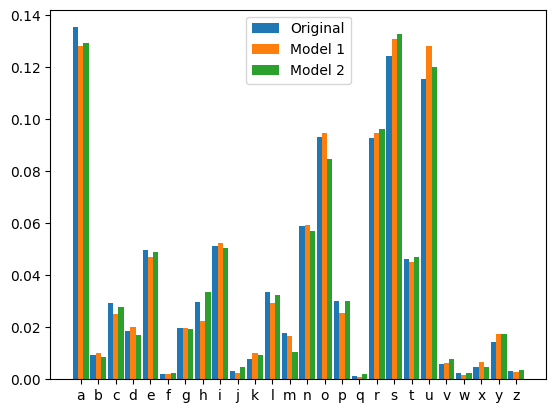

In [37]:
letters = letterFrequency('dinos.txt')
letters1 = letterFrequency('dinos_model1.txt')
letters2 = letterFrequency('dinos_model2.txt')

# convert to percentage
total = sum(letters.values())
letters = {k: v/total for k, v in letters.items()}
total = sum(letters1.values())
letters1 = {k: v/total for k, v in letters1.items()}
total = sum(letters2.values())
letters2 = {k: v/total for k, v in letters2.items()}

# print the bars next to each other
fig, ax = plt.subplots()
bar_width = 0.3
bar_positions = np.arange(len(letters))
ax.bar(bar_positions, letters.values(), bar_width, label='Original')

bar_positions1 = bar_positions + bar_width
ax.bar(bar_positions1, letters1.values(), bar_width, label='Model 1')

bar_positions2 = bar_positions1 + bar_width
ax.bar(bar_positions2, letters2.values(), bar_width, label='Model 2')

ax.set_xticks(bar_positions1)
ax.set_xticklabels(letters.keys())
ax.legend()

plt.show()

Les fréquences sont les mêmes que dans le fichier de base

## Affichage des matrices de fréquence des lettres par position

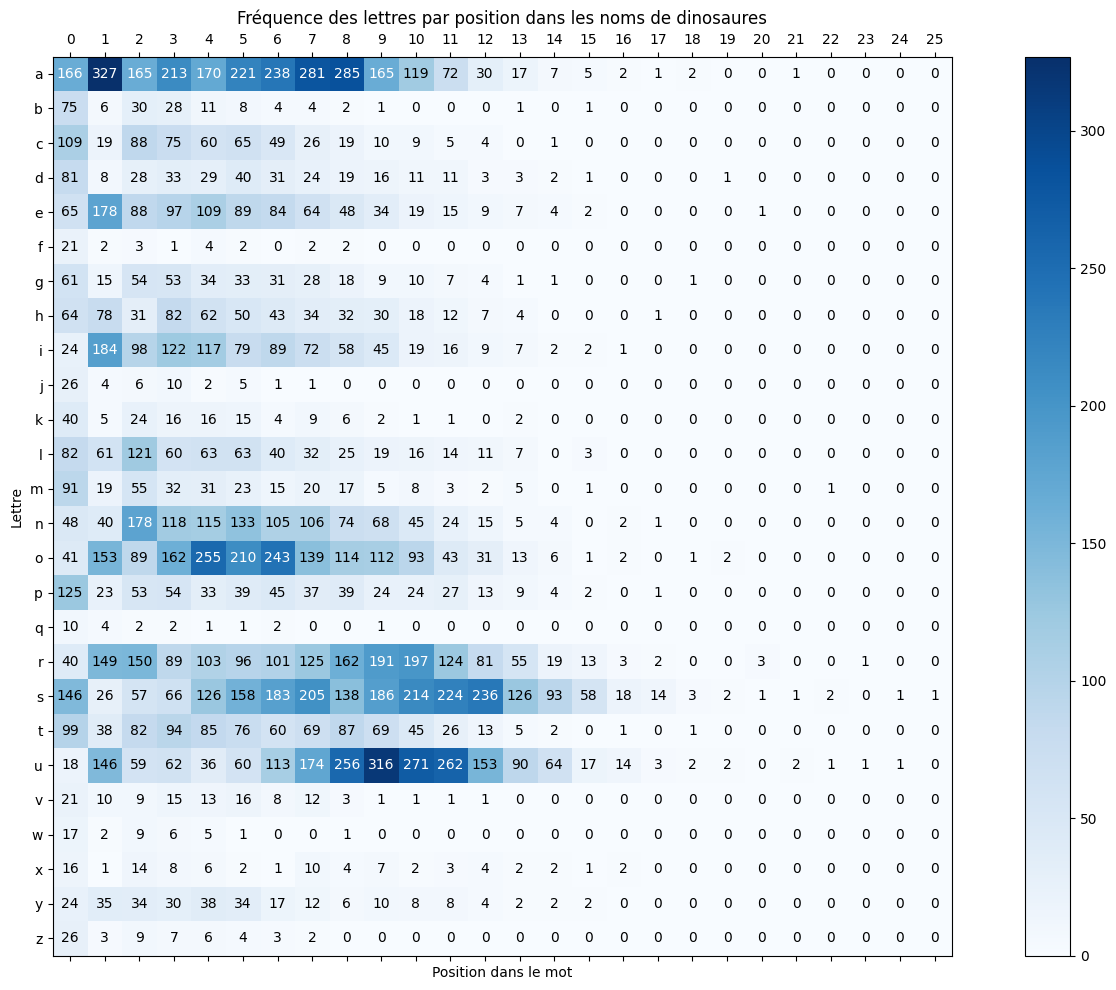

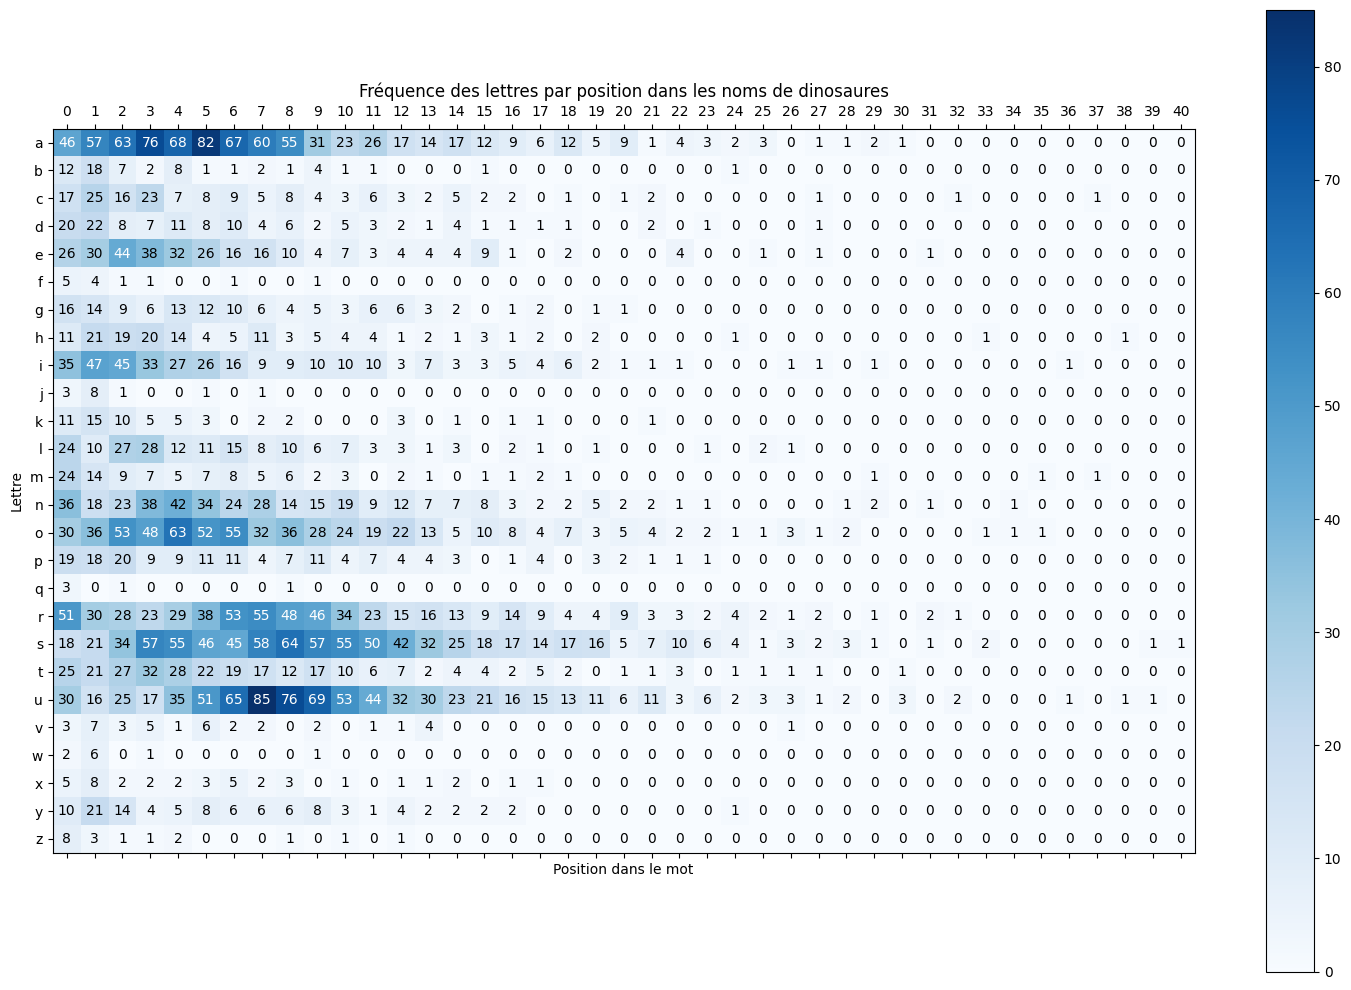

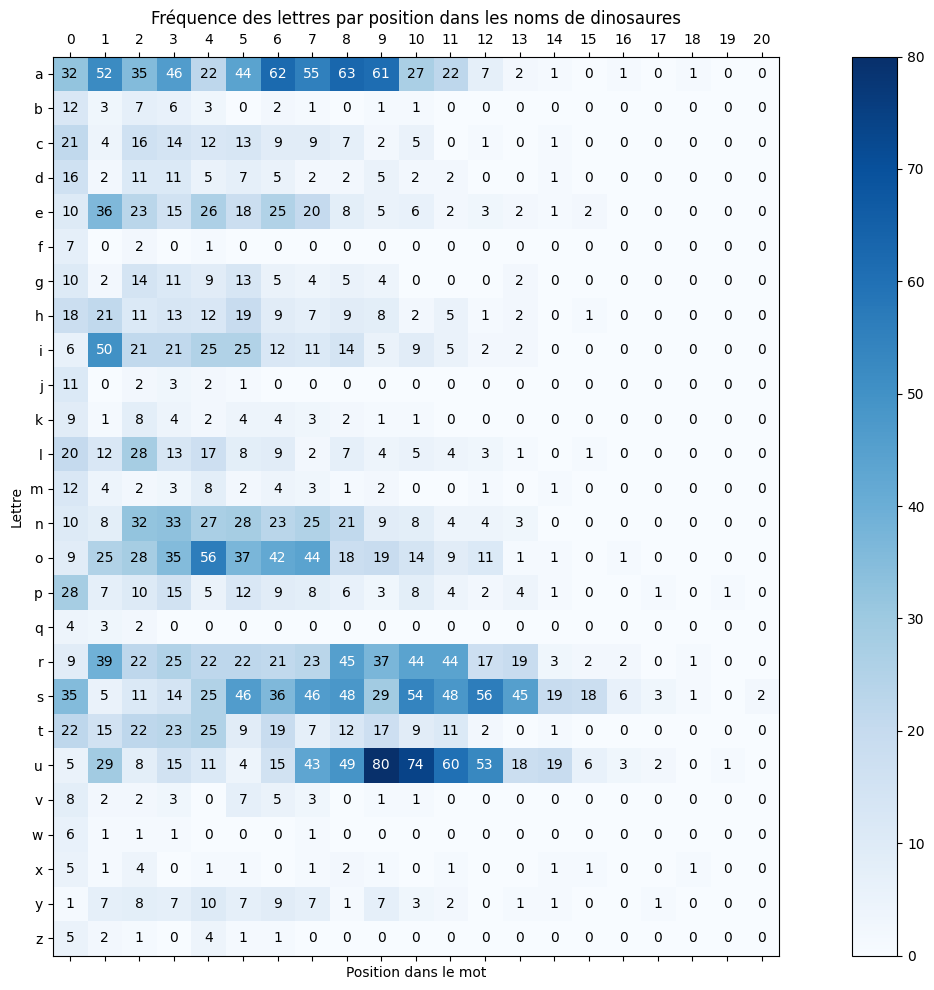

In [38]:
# plot the letter frequency by position
lettersByPosition = letterFrequencyByPosition('dinos.txt')
plot_letter_frequencies(lettersByPosition)
plt.show()

lettersByPosition = letterFrequencyByPosition('dinos_model1.txt')
plot_letter_frequencies(lettersByPosition)
plt.show()

lettersByPosition = letterFrequencyByPosition('dinos_model2.txt')
plot_letter_frequencies(lettersByPosition)
plt.show()

N'ayant pas de vrai taille maximale de génération (fixée à 150), on remarque que le premier modèle a parfois plus de mal à s'arrêter, ayant gérérés quelques nom très long comparé au second qui a eu moins tendance à partir dans les extrêmes.

## Affichage des tailles moyennes des nouveaux noms

In [39]:
average_length = sum([len(word) for word in dinos]) / len(dinos)
print("Average lenght fichier de base : ",average_length)
average_length1 = sum([len(word) for word in dinos1]) / len(dinos1)
print("Average lenght model 1 : ", average_length1)
average_length2 = sum([len(word) for word in dinos2]) / len(dinos2)
print("Average lenght model 2 : ", average_length2)

Average lenght fichier de base :  11.962239583333334
Average lenght model 1 :  13.30204081632653
Average lenght model 2 :  13.462235649546828


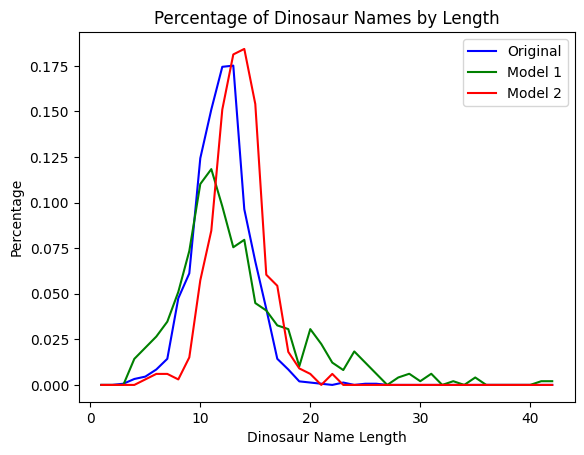

In [57]:
# Calculate lengths
lengths = [len(word) for word in dinos] 
lengths1 = [len(word) for word in dinos1]
lengths2 = [len(word) for word in dinos2]

# Count the number of dinos of each length
lengths_count = {}
for length in lengths:
    lengths_count[length] = lengths_count.get(length, 0) + 1

lengths_count1 = {}
for length in lengths1:
    lengths_count1[length] = lengths_count1.get(length, 0) + 1

lengths_count2 = {}
for length in lengths2:
    lengths_count2[length] = lengths_count2.get(length, 0) + 1

# Convert counts to percentages
total = len(dinos)
lengths_count = {k: v / total for k, v in lengths_count.items()}
total1 = len(dinos1)
lengths_count1 = {k: v / total1 for k, v in lengths_count1.items()}
total2 = len(dinos2)
lengths_count2 = {k: v / total2 for k, v in lengths_count2.items()}

# Define the x-axis range based on the maximum length in any set
max_length = max(max(lengths_count.keys()), max(lengths_count1.keys()), max(lengths_count2.keys()))
x_values = np.arange(1, max_length + 1)

# Prepare y-values, setting default to 0 for missing lengths
y_values = [lengths_count.get(i, 0) for i in x_values]
y_values1 = [lengths_count1.get(i, 0) for i in x_values]
y_values2 = [lengths_count2.get(i, 0) for i in x_values]

# Plot each curve
plt.plot(x_values, y_values, label='Original', color='blue', marker=None)
plt.plot(x_values, y_values1, label='Model 1', color='green', marker=None)
plt.plot(x_values, y_values2, label='Model 2', color='red', marker=None)

# Labeling
plt.xlabel('Dinosaur Name Length')
plt.ylabel('Percentage')
plt.title('Percentage of Dinosaur Names by Length')
plt.legend()

# Show plot
plt.show()


Les noms du models n-grammes ont des tailles plus diaparates que les autres

## Création du dinosaure moyen

En supprimant l'aléatoire dans la génération et en prenant argmax sur la couche softmax, on peut prédire un nom de dinosaure qui va être celui qui sera le plus représentatif des models

In [41]:
def generate_name1(model, max_length=150):
    current_name = '<'  # Start token
    input = current_name

    while len(current_name) < max_length:
        x = vectorizer1([input])

        pred = model.predict(x, verbose=0)[0]

        next_token_idx = np.argmax(pred)
        next_token = vocab1[next_token_idx].replace(" ", "")  # Remove spaces

        current_name += next_token
        input = current_name[-ngram_size:] # Keep only the last ngram_size characters

        if '>' in next_token or '<' in next_token:
            current_name += next_token
            break

     #remove all after > if it exists
    if '>' in current_name:
        current_name = current_name[:current_name.index('>')]
    # remove the first <
    current_name = current_name[1:]
    return current_name


In [42]:
def generate_name2(model, max_length=150):
    current_name = '<'  # Start token
    input = current_name

    while len(current_name) < max_length:
        x = vectorizer2([input])

        pred = model.predict(x, verbose=0)[0]

        next_token_idx = np.argmax(pred)
        next_token = vocab2[next_token_idx].replace(" ", "")  # Remove spaces

        current_name += next_token
        input = current_name # Keep only the last ngram_size characters

        if '>' in next_token or '<' in next_token:
            current_name += next_token
            break

    if '>' in current_name:
        current_name = current_name[:current_name.index('>')]
    current_name = current_name[1:]
    return current_name

In [43]:
print("\nNouveaux noms moyens de dinosaures générés:")
for _ in range(5):
    new_name1 = generate_name1(model1)
    print("Nom dinosaure model 1 : ", new_name)

for _ in range(5):
    new_name2 = generate_name2(model2)
    print("Nom dinosaure model 2 : ", new_name)


Nouveaux noms moyens de dinosaures générés:
Nom dinosaure model 1 :  hienisaurus
Nom dinosaure model 1 :  hienisaurus
Nom dinosaure model 1 :  hienisaurus
Nom dinosaure model 1 :  hienisaurus
Nom dinosaure model 1 :  hienisaurus
Nom dinosaure model 2 :  hienisaurus
Nom dinosaure model 2 :  hienisaurus
Nom dinosaure model 2 :  hienisaurus
Nom dinosaure model 2 :  hienisaurus
Nom dinosaure model 2 :  hienisaurus


On peut voir qu'ici les deux models ont générés le même nom, ce qui peut être étonnant puisque le premier ne garde pas plus de 3 lettres de contexte en mémoire. Cependant on remarque surtout que ce nom est bien meilleur que la valeur étalon "Aanaoaoaauuu".

### Affichage des noms générés

In [59]:
# afficher quelques exemples de noms générés dans le fichier dinos_model1.txt et dinos_model2.txt
with open('dinos_model1.txt') as f:
    dinos1 = f.readlines()
with open('dinos_model2.txt') as f:
    dinos2 = f.readlines()
    
print("Noms de dinosaures générés par le modèle 1 :")
for name in dinos1[:10]:
    print(name.strip())
    
print("\nNoms de dinosaures générés par le modèle 2 :")
for name in dinos2[:10]:
    print(name.strip())

Noms de dinosaures générés par le modèle 1 :
nmingkankangosaurus
nzhousaurus
skelesaurosaurus
urbacovuchiayusaurus
lsaurus
sinus
iatitansauru
tabrentosaurus
seodocursor
realosaurosaurus

Noms de dinosaures générés par le modèle 2 :
shantonghesaurus
halszkaurus
gingenlong
toriliodon
daltosaurus
richthosaurus
wadhintesaurus
ceratonyx
taxinatisaurus
propactosaurus


Les noms du second model ont tendance à plus ressembler à des noms de dinosaures existants

## Conclusion

Nous avons donc deux models capable de génréer des noms de dinosaures.
Le premier avec n-grammes créé des noms de tailles plus disparates et plus originaux, puisqu'il ne se base que sur les n derniers caracteres il a parfois du mal à s'arrêter, et ne considere pas du tout le début du mot pour la génération. Il créé donc également plus de nouveaux noms.
Le second avec des LSTM créé des noms plus proches de ceux existants, et de tailles plus homogènes. Il prend en compte le début du mot pour la génération, lui permettant d'être plus proche des noms existants. Le soucis est qu'il a tendance à générer des noms déjà existants.